In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [142]:
%cd /content/drive/My Drive/Colab Notebooks/PR3

/content/drive/My Drive/Colab Notebooks/PR3


In [143]:
ls


 dataset.csv   minimum_risk.csv  'PR3 PENGENALAN POLA.ipynb'


In [146]:
import pandas as pd
import numpy as np

# Data format CSV untuk diagram lightness

In [167]:
data=pd.read_csv('dataset.csv')
df

,lightness,countSalmon,countSeabass
0,0-0.5,0,0
1,0.5-1,2,0
2,1-1.5,8,0
3,1.5-2,4,0
4,2-2.5,7,0
5,2.5-3,10,0
6,3-3.5,12,0
7,3.5-4,8,1
8,4-4.5,6,0
9,4.5-5,8,3


# Implementasi perhitungan P(kelas) dan P(x|kelas) berdasarkan data 

In [168]:
countSalmon=data.loc[:,'countSalmon']
countSeabass=data.loc[:, 'countSeabass']
jumlahSalmon=sum(countSalmon)
jumlahSeabass= sum(countSeabass)
print('jumlah salmon = ',jumlahSalmon)
print('jumlah seabass = ',jumlahSeabass)
Psalmon= jumlahSalmon/(jumlahSalmon+jumlahSeabass)
Pseabass= jumlahSeabass/(jumlahSalmon+jumlahSeabass)
print("P(w=salmon) = ", Psalmon)
print("P(w=seabass) = ", Pseabass)

jumlah salmon =  74
jumlah seabass =  57
P(w=salmon) =  0.5648854961832062
P(w=seabass) =  0.4351145038167939


In [169]:
Prentang_salmon=countSalmon/jumlahSalmon
print('P(x|w=salmon)\n', Prentang_salmon)
Prentang_seabass=countSeabass/jumlahSeabass
print('P(x|w=seabass)\n', Prentang_seabass)

P(x|w=salmon)
 0     0.000000
1     0.027027
2     0.108108
3     0.054054
4     0.094595
5     0.135135
6     0.162162
7     0.108108
8     0.081081
9     0.108108
10    0.054054
11    0.040541
12    0.013514
13    0.013514
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
Name: countSalmon, dtype: float64
P(x|w=seabass)
 0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.017544
8     0.000000
9     0.052632
10    0.052632
11    0.070175
12    0.105263
13    0.087719
14    0.210526
15    0.157895
16    0.157895
17    0.035088
18    0.017544
19    0.035088
Name: countSeabass, dtype: float64


# Implementasi bayes decision rule berbasis maximum posterior probability.

In [170]:
#Posterior conditional probability: P(ωi|x) → P(x|ωi).P(ωi)
PosteriorSalmon= Prentang_salmon*Psalmon
print('Posterior Salmon: \n', PosteriorSalmon)
PosteriorSeabass= Pseabass*Prentang_seabass
print('Posterior Seabass: \n', PosteriorSeabass)

Posterior Salmon: 
 0     0.000000
1     0.015267
2     0.061069
3     0.030534
4     0.053435
5     0.076336
6     0.091603
7     0.061069
8     0.045802
9     0.061069
10    0.030534
11    0.022901
12    0.007634
13    0.007634
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
Name: countSalmon, dtype: float64
Posterior Seabass: 
 0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.007634
8     0.000000
9     0.022901
10    0.022901
11    0.030534
12    0.045802
13    0.038168
14    0.091603
15    0.068702
16    0.068702
17    0.015267
18    0.007634
19    0.015267
Name: countSeabass, dtype: float64


In [171]:
classIkan=[]
for i in range(len(PosteriorSalmon)):
  if PosteriorSalmon[i]>PosteriorSeabass[i]:
   classIkan.append('Salmon')
  else:
    classIkan.append('Seabass')

classIkan

['Seabass',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass']

In [180]:
Tabel_Klasifikasi = pd.DataFrame({
    "lightness": df.lightness,
    "countSalmon": df.countSalmon,
    "countSeabass": df.countSeabass,
    "posteriorSalmon": PosteriorSalmon,
    "posteriorSeabass": PosteriorSeabass,
    "classIkan": classIkan
})

Tabel_Klasifikasi

,lightness,countSalmon,countSeabass,posteriorSalmon,posteriorSeabass,classIkan
0,0-0.5,0,0,0.000000,0.000000,Seabass
1,0.5-1,2,0,0.015267,0.000000,Salmon
2,1-1.5,8,0,0.061069,0.000000,Salmon
3,1.5-2,4,0,0.030534,0.000000,Salmon
4,2-2.5,7,0,0.053435,0.000000,Salmon
5,2.5-3,10,0,0.076336,0.000000,Salmon
6,3-3.5,12,0,0.091603,0.000000,Salmon
7,3.5-4,8,1,0.061069,0.007634,Salmon
8,4-4.5,6,0,0.045802,0.000000,Salmon
9,4.5-5,8,3,0.061069,0.022901,Salmon


# Implementasi bayes decision rule berbasis minimum risk. 
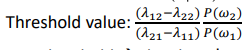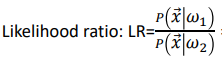
Terdapat 2 action alpha1 decide salmon, alpha2 decide seabass. Definisi loss sebagai 0 jika alpha-i utk kategori ikan sudah benar, dan 1 jika kategorinya salah. 

In [173]:
ls

 dataset.csv   minimum_risk.csv  'PR3 PENGENALAN POLA.ipynb'


In [182]:
data2=pd.read_csv('minimum_risk.csv')
df1


,Loss,Salmon,Seabass
0,Salmon,0,1
1,Seabass,1,0


In [175]:
#Menghitung Threshold= (lamda12-lamda22)*P(w=seabass) / (lamda21-lamda11)*P(w=salmon)
lamda11=df1.loc[0,'Salmon']
lamda12=df1.loc[0,'Seabass']
lamda21=df1.loc[1,'Salmon']
lamda22=df1.loc[1,'Seabass']
Threshold=((lamda12-lamda22)*Pseabass) / ((lamda21-lamda11)*Psalmon)
print('Threshold:',Threshold)
print()
#likelihood ratio(LR): P(x|w=salmon)/P(x|w=seabass)
LR=Prentang_salmon/Prentang_seabass
print('Likelihood Ratio(LR):\n',LR)
#jika LR>Threshold maka decide salmon


Threshold: 0.7702702702702702

Likelihood Ratio(LR):
 0          NaN
1          inf
2          inf
3          inf
4          inf
5          inf
6          inf
7     6.162162
8          inf
9     2.054054
10    1.027027
11    0.577703
12    0.128378
13    0.154054
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
dtype: float64


In [177]:
classIkan =[]
for i in range(len(LR)):
  if LR[i]>Threshold:
    classIkan.append('Salmon')
  else:
    classIkan.append('Seabass')
classIkan


['Seabass',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass']

In [186]:
Tabel_Klasifikasi0 = pd.DataFrame({
    "lightness": df.lightness,
    "countSalmon": df.countSalmon,
    "countSeabass": df.countSeabass,
    "LikelihoodRatio": LR,
    "Threshold": [Threshold for i in range(len(LR))],
    "classIkan": classIkan
})

Tabel_Klasifikasi0


,lightness,countSalmon,countSeabass,LikelihoodRatio,Threshold,classIkan
0,0-0.5,0,0,NaN,0.77027,Seabass
1,0.5-1,2,0,inf,0.77027,Salmon
2,1-1.5,8,0,inf,0.77027,Salmon
3,1.5-2,4,0,inf,0.77027,Salmon
4,2-2.5,7,0,inf,0.77027,Salmon
5,2.5-3,10,0,inf,0.77027,Salmon
6,3-3.5,12,0,inf,0.77027,Salmon
7,3.5-4,8,1,6.162162,0.77027,Salmon
8,4-4.5,6,0,inf,0.77027,Salmon
9,4.5-5,8,3,2.054054,0.77027,Salmon


# Improvement: Cara lain dengan menambahkan nilai 1 untuk tiap data salmon dan seabass pada rentang

# Preprocessing Data 
preprocessing data dilakukan karena pada data tersebut, perhitungan probabilitas P(x|w=salmon) dan P(x|w=seabass) beberapa instance menghasilkan 0. preprocessing data dapat dilakukan dengan menambahkan nilai 1 untuk tiap value instance yang bernilai 0. Sehingga untuk menghitung posterior nantinya tidak memungkinkan terdapat nilai posterior yang 0 dan memudahkan visualisasi (LR dan Threshold) dalam memberi keputusan menggunakan minimum risk.




In [191]:
countSalmon=np.array(data.countSalmon)+1
countSeabass=np.array(data.countSeabass)+1
print ('Salmon: \n', countSalmon)
print('Seabass: \n',countSeabass)


Salmon: 
 [ 1  3  9  5  8 11 13  9  7  9  5  4  2  2  1  1  1  1  1  1]
Seabass: 
 [ 1  1  1  1  1  1  1  2  1  4  4  5  7  6 13 10 10  3  2  3]


#Implementasi perhitungan P(kelas) dan P(x|kelas) berdasarkan data yang sudah dipreproses.

In [192]:
jumlahSalmon=countSalmon.sum()
jumlahSeabass=countSeabass.sum()
print('Jumlah Salmon Menjadi: ', jumlahSalmon)
print('Jumlah Seabass Menjadi: ', jumlahSeabass)
Psalmon= jumlahSalmon/(jumlahSalmon+jumlahSeabass)
Pseabass= jumlahSeabass/(jumlahSalmon+jumlahSeabass)
print("P(w=salmon) = ", Psalmon)
print("P(w=seabass) = ", Pseabass)

Jumlah Salmon Menjadi:  94
Jumlah Seabass Menjadi:  77
P(w=salmon) =  0.5497076023391813
P(w=seabass) =  0.4502923976608187


In [193]:
Prentang_salmon=countSalmon/jumlahSalmon
print('P(x|w=salmon)\n', Prentang_salmon)
Prentang_seabass=countSeabass/jumlahSeabass
print('P(x|w=seabass)\n', Prentang_seabass)

P(x|w=salmon)
 [0.0106383  0.03191489 0.09574468 0.05319149 0.08510638 0.11702128
 0.13829787 0.09574468 0.07446809 0.09574468 0.05319149 0.04255319
 0.0212766  0.0212766  0.0106383  0.0106383  0.0106383  0.0106383
 0.0106383  0.0106383 ]
P(x|w=seabass)
 [0.01298701 0.01298701 0.01298701 0.01298701 0.01298701 0.01298701
 0.01298701 0.02597403 0.01298701 0.05194805 0.05194805 0.06493506
 0.09090909 0.07792208 0.16883117 0.12987013 0.12987013 0.03896104
 0.02597403 0.03896104]


# Implementasi bayes decision rule berbasis maximum posterior probability dari data yang sudah dipreproses.

In [194]:
#Posterior conditional probability: P(ωi|x) → P(x|ωi).P(ωi)
PosteriorSalmon= Prentang_salmon*Psalmon
print('Posterior Salmon: \n', PosteriorSalmon)
PosteriorSeabass= Pseabass*Prentang_seabass
print('Posterior Seabass: \n', PosteriorSeabass)

Posterior Salmon: 
 [0.00584795 0.01754386 0.05263158 0.02923977 0.04678363 0.06432749
 0.07602339 0.05263158 0.04093567 0.05263158 0.02923977 0.02339181
 0.01169591 0.01169591 0.00584795 0.00584795 0.00584795 0.00584795
 0.00584795 0.00584795]
Posterior Seabass: 
 [0.00584795 0.00584795 0.00584795 0.00584795 0.00584795 0.00584795
 0.00584795 0.01169591 0.00584795 0.02339181 0.02339181 0.02923977
 0.04093567 0.03508772 0.07602339 0.05847953 0.05847953 0.01754386
 0.01169591 0.01754386]


In [195]:
classIkan=[]
for i in range(len(PosteriorSalmon)):
  if PosteriorSalmon[i]>PosteriorSeabass[i]:
   classIkan.append('Salmon')
  else:
    classIkan.append('Seabass')

classIkan

['Seabass',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass']

In [197]:
Tabel_Klasifikasi1 = pd.DataFrame({
    "lightness": df.lightness,
    "countSalmon": df.countSalmon,
    "countSeabass": df.countSeabass,
    "posteriorSalmon": PosteriorSalmon,
    "posteriorSeabass": PosteriorSeabass,
    "classIkan": classIkan
})

Tabel_Klasifikasi1

,lightness,countSalmon,countSeabass,posteriorSalmon,posteriorSeabass,classIkan
0,0-0.5,0,0,0.005848,0.005848,Seabass
1,0.5-1,2,0,0.017544,0.005848,Salmon
2,1-1.5,8,0,0.052632,0.005848,Salmon
3,1.5-2,4,0,0.029240,0.005848,Salmon
4,2-2.5,7,0,0.046784,0.005848,Salmon
5,2.5-3,10,0,0.064327,0.005848,Salmon
6,3-3.5,12,0,0.076023,0.005848,Salmon
7,3.5-4,8,1,0.052632,0.011696,Salmon
8,4-4.5,6,0,0.040936,0.005848,Salmon
9,4.5-5,8,3,0.052632,0.023392,Salmon


# Implementasi bayes decision rule berbasis minimum risk dari data yang sudah dipreproses. 
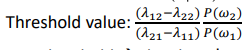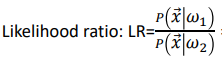

Terdapat 2 action alpha1 decide salmon, alpha2 decide seabass. Definisi loss sebagai 0 jika alpha-i utk kategori ikan sudah benar, dan 1 jika kategorinya salah. 

In [198]:
ls


 dataset.csv   minimum_risk.csv  'PR3 PENGENALAN POLA.ipynb'


In [200]:
data2=pd.read_csv('minimum_risk.csv')
df1

,Loss,Salmon,Seabass
0,Salmon,0,1
1,Seabass,1,0


In [201]:
#Menghitung Threshold= (lamda12-lamda22)*P(w=seabass) / (lamda21-lamda11)*P(w=salmon)
lamda11=df1.loc[0,'Salmon']
lamda12=df1.loc[0,'Seabass']
lamda21=df1.loc[1,'Salmon']
lamda22=df1.loc[1,'Seabass']
Threshold=((lamda12-lamda22)*Pseabass) / ((lamda21-lamda11)*Psalmon)
print('Threshold:',Threshold)
print()
#likelihood ratio(LR): P(x|w=salmon)/P(x|w=seabass)
LR=Prentang_salmon/Prentang_seabass
print('Likelihood Ratio(LR):\n',LR)
#jika LR>Threshold maka decide salmon


Threshold: 0.8191489361702128

Likelihood Ratio(LR):
 [ 0.81914894  2.45744681  7.37234043  4.09574468  6.55319149  9.0106383
 10.64893617  3.68617021  5.73404255  1.84308511  1.02393617  0.65531915
  0.23404255  0.27304965  0.06301146  0.08191489  0.08191489  0.27304965
  0.40957447  0.27304965]


In [202]:
classIkan =[]
for i in range(len(LR)):
  if LR[i]>Threshold:
    classIkan.append('Salmon')
  else:
    classIkan.append('Seabass')
 #["Salmon" if a > Threshold else "seabass" for a in LR]
classIkan

['Seabass',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Salmon',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass',
 'Seabass']

In [203]:
Tabel_Klasifikasi2 = pd.DataFrame({
    "lightness": df.lightness,
    "countSalmon": df.countSalmon,
    "countSeabass": df.countSeabass,
    "LikelihoodRatio": LR,
    "Threshold": [Threshold for i in range(len(LR))],
    "classIkan": classIkan
})

Tabel_Klasifikasi2

,lightness,countSalmon,countSeabass,LikelihoodRatio,Threshold,classIkan
0,0-0.5,0,0,0.819149,0.819149,Seabass
1,0.5-1,2,0,2.457447,0.819149,Salmon
2,1-1.5,8,0,7.372340,0.819149,Salmon
3,1.5-2,4,0,4.095745,0.819149,Salmon
4,2-2.5,7,0,6.553191,0.819149,Salmon
5,2.5-3,10,0,9.010638,0.819149,Salmon
6,3-3.5,12,0,10.648936,0.819149,Salmon
7,3.5-4,8,1,3.686170,0.819149,Salmon
8,4-4.5,6,0,5.734043,0.819149,Salmon
9,4.5-5,8,3,1.843085,0.819149,Salmon
